<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [19]:
#loading dataset
adu = pd.read_csv("/content/drive/MyDrive/Research/ASD/Autism-Adult-Data.csv",na_values=['?'])

In [20]:
#Adults
adu.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
153,154,0,0,1,0,1,0,1,0,1,...,m,Asian,no,no,Sri Lanka,no,5,18 and more,Self,NO
199,200,1,1,1,1,0,0,0,0,0,...,f,Pasifika,no,yes,United States,no,4,18 and more,Self,NO
400,401,1,0,0,1,0,0,1,1,0,...,f,NaN,no,no,United Arab Emirates,no,5,18 and more,NaN,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
216,217,1,0,0,0,0,0,1,1,0,...,f,NaN,yes,no,United Arab Emirates,no,4,18 and more,NaN,NO


In [21]:
# Number of tuples and fields
print("Adults      :",adu.shape)

Adults      : (704, 22)


In [22]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [23]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [24]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [25]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

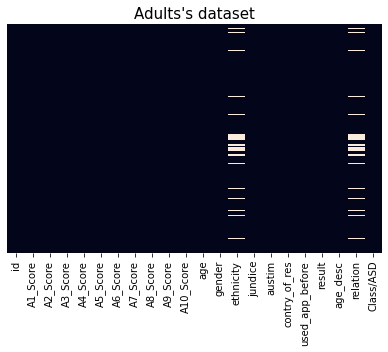

In [26]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_adu.pdf', transparent=True, dpi=300)

In [27]:
#ASD or Not
print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


In [28]:
# #Data distribution
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.countplot(adu['Class/ASD'],ax=ax)
# ax.set_title("Adults's dataset",fontsize = 15)
# fig.tight_layout()
# plt.savefig('distribution_adu.pdf', transparent=True, dpi=300)

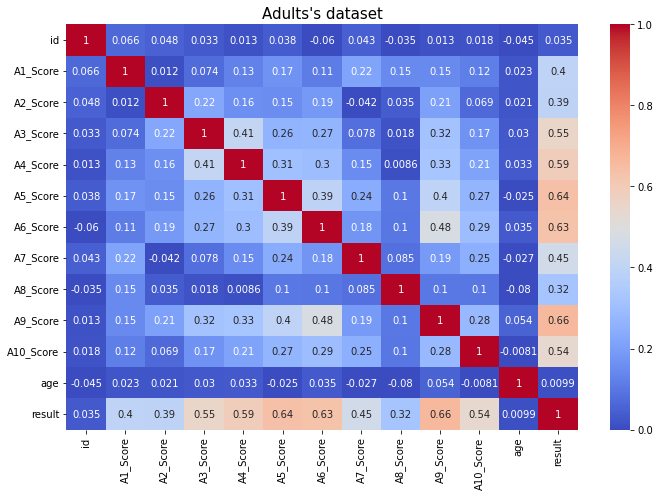

In [29]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(adu.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_adu.pdf', transparent=True, dpi=300)

In [30]:
#Number of missing values in each dataset
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Adults's dataset      =  192


In [31]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [32]:
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Adults's dataset      =  0


In [33]:
#Since age of toddlers are represented in months, age(in years) of adults is converted to age in months.
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

adu['Age_Mons'] = adu['Age_Mons']*12

In [34]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

### **Model fitting**

*Spliting dependent and independent features*


In [35]:
shuffled_data = adu.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=189)
adu= pd.concat([ASD_data, non_ASD_data])

In [36]:
# Split the data into features and target label
raw_target= adu['Class/ASD']
raw_features = adu[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [38]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
146,1,0,1,1,1,1,1,1,1,1,0.008197,m,White-European,no,no,Australia,0.9,Self
169,1,1,1,1,1,0,0,1,1,1,0.051913,f,Latino,no,yes,Brazil,0.8,Self
641,1,0,1,1,1,0,1,1,1,0,0.032787,m,Latino,no,no,United States,0.7,Self
681,1,1,0,1,1,1,1,1,1,1,0.087432,f,Hispanic,no,no,United States,0.9,Self
696,1,1,1,1,1,1,0,1,1,1,0.038251,m,Turkish,no,yes,Australia,0.9,Self


##Encoding Categorical variables

In [39]:
features = pd.get_dummies(features_minmax_transform)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [41]:
def model_report(y_act, y_pred):
    from sklearn import metrics
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")
    pass


In [42]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

## Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                              Features      Score
8                             A9_Score  80.021505
5                             A6_Score  75.588957
2                             A3_Score  57.742574
4                             A5_Score  52.547325
3                             A4_Score  40.694915
11                              result  31.067660
9                            A10_Score  24.284047
27                          austim_yes  24.019608
68  contry_of_res_United Arab Emirates  22.090909
45                 contry_of_res_India  17.789474
6                             A7_Score  17.475728
1                             A2_Score  16.655502
70         contry_of_res_United States  16.055556
14                     ethnicity_Asian  13.066667
18           ethnicity_Middle Eastern   11.918919
22            ethnicity_White-European  11.136842
25                         jundice_yes   9.756757
49                contry_of_res_Jordan   8.066667
7                             A8_Score   7.472325


In [45]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X, y)
y = target

In [46]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Clustering

In [47]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (378, 75)
y.shape: (378,)
X: [[1. 0. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]]


##KNeighborsClassifier

In [48]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [49]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [50]:
print('\n All results:')
print(knn_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00115614, 0.00431867, 0.00148668, 0.00068679, 0.00250244,
       0.0008286 , 0.00107012, 0.00543079, 0.00221057, 0.0007565 ,
       0.00067458, 0.00164995, 0.00139427, 0.00089869, 0.0014338 ,
       0.00163708, 0.002947  , 0.00068665, 0.00101485, 0.00093875,
       0.0010119 , 0.00064821, 0.00058393, 0.00088792, 0.00198455,
       0.00092287, 0.00164132, 0.00062642, 0.00102882, 0.00065079,
       0.00143557, 0.00268974, 0.00209727, 0.00529337, 0.00099225,
       0.0015728 , 0.00120168, 0.00074468, 0.00115438, 0.00130191,
       0.00650091, 0.00206451, 0.00136585, 0.00121846, 0.00108266,
       0.0015101 , 0.00090041, 0.00123186, 0.00067472, 0.00193219,
       0.00172529, 0.00214376, 0.00177441, 0.00096459, 0.00059943,
       0.00198245, 0.00112939, 0.00164385, 0.00134468, 0.00062413,
       0.00179782, 0.00170369, 0.0025557 , 0.00105391, 0.00131431,
       0.01052794, 0.001371  , 0.00192213, 0.00436845, 0.00086126,
       0.00189142, 0.00180969

In [51]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='kd_tree', leaf_size=778, n_neighbors=223,
                     weights='distance')


In [52]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'distance', 'n_neighbors': 223, 'leaf_size': 778, 'algorithm': 'kd_tree'}


In [53]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='distance', n_neighbors= 223, leaf_size=778, algorithm='kd_tree')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=778, n_neighbors=223,
                     weights='distance')

In [54]:
y_pred_knn = knn.predict(X_test)
model_report(y_test, y_pred_knn)

Accuracy =  0.9605263157894737
Precision =  0.9361702127659575
Recall\Sensitivity =  1.0
Specificity =  0.90625
F1 Score =  0.967032967032967
AUC Score = 0.953125
Kappa score =  0.9179856115107914
Log Loss =  1.4227757916756774 



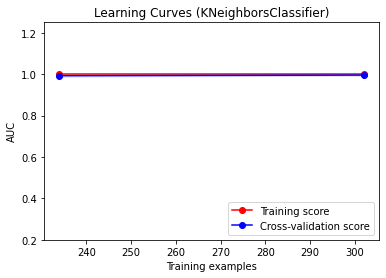

In [55]:
title = "Learning Curves (KNeighborsClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier(weights='distance', n_neighbors= 223, leaf_size=778, algorithm='kd_tree')                                 # fill this in
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)
plt.show()

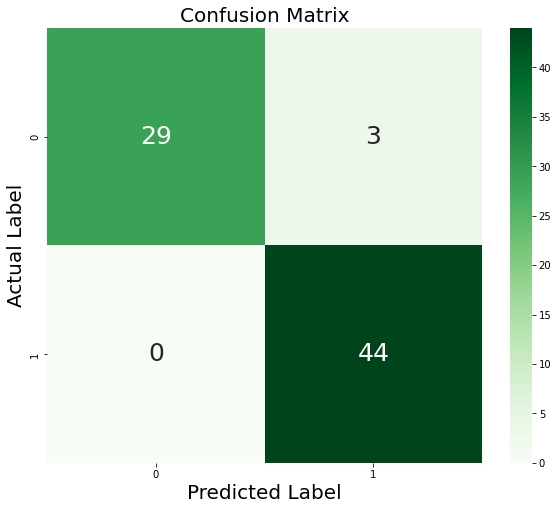

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300)
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300)

##SVM Classifier

In [57]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [58]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [59]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00522876, 0.0043077 , 0.0033998 , 0.00345421, 0.00343561,
       0.00448265, 0.00294943, 0.00410504, 0.00683455, 0.00288982,
       0.0039741 , 0.00291061, 0.00358481, 0.00489116, 0.00354929,
       0.00356483, 0.00288687, 0.00374203, 0.00334525, 0.00708847,
       0.0040381 , 0.00342889, 0.00364394, 0.00313134, 0.00324512,
       0.00439076, 0.00625916, 0.00415597, 0.00301776, 0.00633979,
       0.00370903, 0.00376387, 0.00381503, 0.00325885, 0.00321674,
       0.00448351, 0.0064599 , 0.00456233, 0.00296073, 0.00793796,
       0.00332088, 0.00444069, 0.00494919, 0.00281715, 0.0035727 ,
       0.00345726, 0.00574117, 0.00391726, 0.00359626, 0.00364757,
       0.00418758, 0.00440402, 0.0056869 , 0.00733023, 0.00357528,
       0.00349493, 0.00516376, 0.00479541, 0.00321913, 0.00589137,
       0.00304942, 0.00276799, 0.00395832, 0.00427809, 0.00385971,
       0.00454192, 0.00399675, 0.00290403, 0.00387545, 0.00355625,
       0.004182  , 0.00337639

In [60]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=1, degree=2, kernel='poly')


In [61]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'poly', 'degree': 2, 'C': 1}


In [62]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [63]:
y_pred_svc = svc.predict(X_test)
model_report(y_test, y_pred_svc)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  2.2204460492503136e-16 



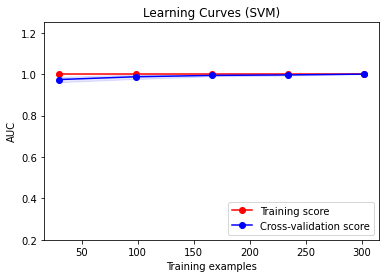

In [64]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

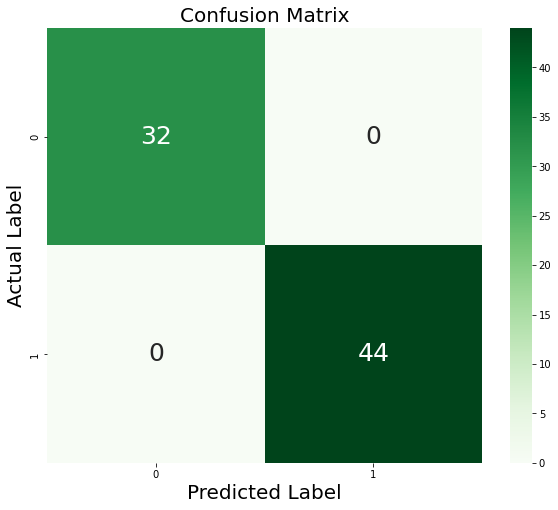

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300)
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300)

##Random Forest Classifier

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
              
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)

In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300)
plt.savefig('RF_confusion.eps', transparent=True, dpi=300)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)

In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')
dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
model_report(y_test, y_pred_dt)

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

##XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

#fit the randomized model
xg_randomcv.fit(X_train,y_train)

In [ ]:
print('\n All results:')
print(xg_randomcv.cv_results_)

In [ ]:
print('\n Best estimator:')
print(xg_randomcv.best_estimator_)

In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 140, max_depth = 2, learning_rate = 0.01)
xg.fit(X_train, y_train)

In [ ]:
y_pred_xg = xg.predict(X_test)
model_report(y_test, y_pred_xg)

In [ ]:
title = "Learning Curves (XGBClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
xg = XGBClassifier(n_estimators = 140, max_depth = 2, learning_rate = 0.01)                             # fill this in
plot_learning_curve(xg, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('XG_curve.pdf', transparent=True, dpi=300)
plt.savefig('XG_curve.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('XG_confusion.pdf', transparent=True, dpi=300)
plt.savefig('XG_confusion.eps', transparent=True, dpi=300)

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
#fit the randomized model
lr_randomcv.fit(X_train,y_train)

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)

In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 1000)
lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 1000)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

In [ ]:
from sklearn.metrics import roc_curve

# Compute fpr, tpr, thresholds and roc auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_lr)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_xg)

In [ ]:
from sklearn.metrics import auc

roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xg = auc(fpr_xg, tpr_xg)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
plt.figure(figsize = (7, 5))
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_LR, tpr_LR, label='LR ROC curve (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_svc, tpr_svc, label='SVM ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_DT, tpr_DT, label='DT ROC curve (area = %0.3f)' % roc_auc_DT)
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, label='XGB ROC curve (area = %0.3f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for 80%-20% Splitting')
plt.legend(loc="lower right")
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(25,'importance')) 

In [ ]:
plt.figure(figsize=(20,7))
featureScores.nlargest(25,'importance').plot(kind='barh')
plt.title('Feature Importance')
plt.savefig('feature_im_adult.pdf', 
           transparent=True, dpi=300)
plt.savefig('feature_im_adult.eps', 
           transparent=True, dpi=300)